## Matplotlib中的三维绘图
Matplotlib最初在设计时仅考虑了二维绘图。在1.0版本发布前后，在Matplotlib的二维显示之上构建了一些三维绘图实用程序，其结果是一组方便的（如果有所限制）的用于三维数据可视化的工具集。通过导入mplot3d工具包（包含在主要Matplotlib安装中）来启用三维图：

In [1]:
from mpl_toolkits import mplot3d

导入此子模块后，可以通过将关键字projection ='3d'传递给任何常规轴创建例程来创建三维轴：

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


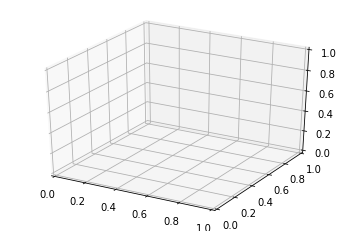

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

启用此三维轴后，我们现在可以绘制各种三维图类型。三维绘图是可以从交互式查看图形而不是在笔记本中静态查看图形的功能中受益匪浅的功能之一；回想一下要使用交互式图形，可以在运行此代码时使用％matplotlib notebook而不是内联％matplotlib。

## 三维点和线
最基本的三维图是根据（x，y，z）三元组创建的散点图的线或集合。与前面讨论的更常见的二维图类似，可以使用ax.plot3D和ax.scatter3D函数创建这些图。它们的呼叫签名几乎与它们的二维呼叫签名相同。在这里，我们将绘制三角螺旋，并在直线附近随机绘制一些点：

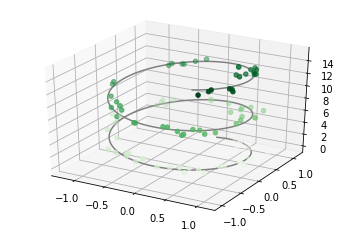

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 创建三维的点图
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### 三维轮廓图
类似于我们在“密度和轮廓图”中探索的轮廓图，mplot3d包含使用相同输入创建三维浮雕图的工具。像二维ax.contour绘图一样，ax.contour3D要求所有输入数据均采用二维规则网格的形式，并在每个点处评估Z数据。在这里，我们将显示三维正弦函数的三维轮廓图：

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

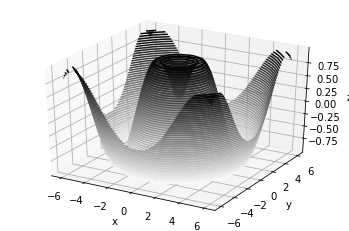

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

有时默认的视角不是最佳的，在这种情况下，我们可以使用view_init方法设置仰角和方位角。在下面的示例中，我们将使用60度的仰角（即，x-y平面上方60度）和35度的方位角（即，围绕z轴逆时针旋转35度）：

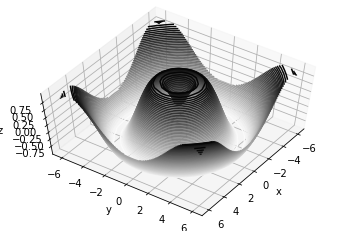

In [7]:
ax.view_init(60, 35)
fig

 
同样，请注意，如果是使用Matplotlib的交互式后端之一时，是可以通过单击和拖动来交互式地完成这种旋转。
### 线框和曲面图
 
处理网格数据的其他两种类型的三维图是线框图和曲面图。它们采用值的网格并将其投影到指定的三维表面上，并使生成的三维形式非常容易可视化。这是使用线框的示例：

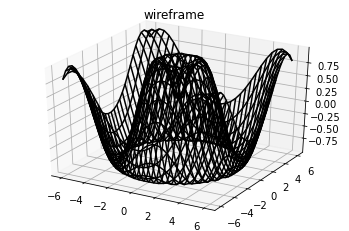

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

曲面图就像线框图一样，但是线框的每个面都是一个填充的多边形。将颜色图添加到填充的多边形可以帮助您感知要可视化的表面的拓扑：

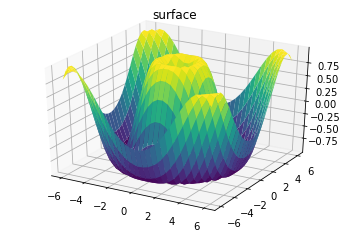

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

请注意，尽管表面图的值网格必须是二维的，但不必是直线的。这是创建局部极坐标网格的示例，当与surface3D图一起使用时，可以为我们提供可视化功能的一部分：

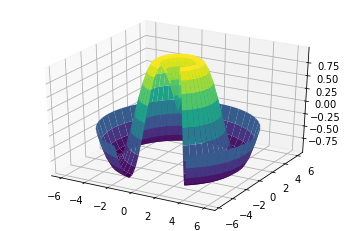

In [10]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

###  表面三角剖分
对于某些应用，上述例程要求的均匀采样的网格过于局限且不便。在这些情况下，基于三角剖分的图可能非常有用。如果不是从笛卡尔坐标系或极坐标网格中绘制均匀图形，而是取一组随机绘制图形怎么办？

In [12]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

 
我们可以创建点的散点图，以了解我们要从中采样的表面：

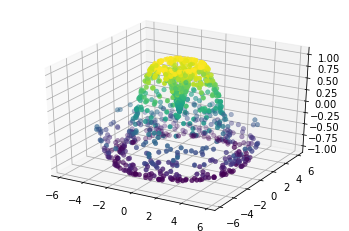

In [13]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);


 这有很多不足之处。在这种情况下，对我们有帮助的函数是ax.plot_trisurf，它首先通过查找在相邻点之间形成的一组三角形来创建曲面（请记住，x，y和z是一维数组）：
 

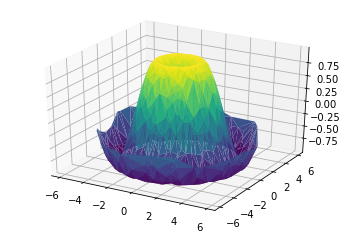

In [16]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

结果肯定不像用网格绘制时那样干净，但是这种三角剖分的灵活性允许一些真正有趣的三维图。例如，实际上可以使用此方法绘制三维莫比乌斯带，如下所示。
### 示例：可视化莫比乌斯带
莫比乌斯纸带类似于用半捻纸粘贴成环的纸带。在拓扑上，这很有趣，因为尽管有外观，但它只有一侧！在这里，我们将使用Matplotlib的三维工具来可视化此类对象。创建莫比乌斯带的关键是考虑它的参数化：这是一个二维带，因此我们需要两个固有维。让我们称它们为θ，在整个循环中范围为0到2π，而在条带宽度上的w范围为-1到1：

In [17]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

现在，通过此参数化，我们必须确定嵌入带的（x，y，z）位置。

考虑一下，我们可能会意识到发生了两种旋转：一种是循环围绕其中心的位置（我们称为θ
），而另一种则是条带绕其轴的扭曲（我们将其称为ϕ）。对于莫比乌斯带，我们必须让该带在整个循环中弯曲一半，或者Δϕ=Δθ/2.。

In [18]:
phi = 0.5 * theta

现在，我们使用三角学的回忆来导出三维嵌入。我们将定义r，即每个点到中心的距离，并使用它来找到嵌入的（x，y，z）坐标：

In [19]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

最后，要绘制对象，必须确保三角剖分正确。最好的方法是在底层参数化中定义三角剖分，然后让Matplotlib将这个三角剖分投影到Möbius条带的三维空间中。这可以通过以下方式完成：

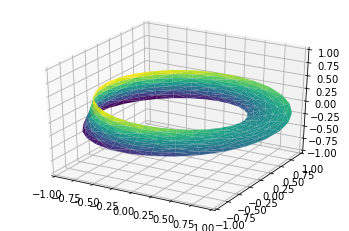

In [20]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

结合所有这些技术，就可以在Matplotlib中创建和显示各种三维对象和图案。